In [109]:
##defining imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline


In [110]:
##importing data
df = pd.read_excel('Junior Data Analyst _ Data.xlsx')

**performing self checks**

In [111]:

df.head()

,Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,DATA,DATA
1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,2020-01-01 00:00:00,0,1.509849
3,1,2020-01-01 01:00:00,0,1.411859
4,2,2020-01-01 02:00:00,0,1.023898


In [112]:
##columns names are in the second row,using that to rename the columns and dropping the first and second row

df.columns = ['Hour','Date/hour start','Solar electricity generation (kWh)','Electricity usage (kWh)']

##description of the hour
'''Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.'''
##dropping row with index 1
df.drop(1, inplace=True)

df.drop(0, inplace=True)
df.reset_index(drop=True, inplace=True)


In [113]:
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0,1.509849
1,1,2020-01-01 01:00:00,0,1.411859
2,2,2020-01-01 02:00:00,0,1.023898
3,3,2020-01-01 03:00:00,0,0.642
4,4,2020-01-01 04:00:00,0,0.96


In [114]:
df.shape

(8760, 4)

In [115]:
df.dtypes

Hour                                  object
Date/hour start                       object
Solar electricity generation (kWh)    object
Electricity usage (kWh)               object
dtype: object

In [116]:
##correcting data types
#converting Solar electricity generation (kWh) and Electricity usage (kWh)  to numeric
df['Solar electricity generation (kWh)'] = pd.to_numeric(df['Solar electricity generation (kWh)'],errors = 'coerce') 
df['Electricity usage (kWh)'] = pd.to_numeric(df['Electricity usage (kWh)'],errors = 'coerce') 

# Convert "Date/hour start" column to datetime
df['Date/hour start'] = pd.to_datetime(df['Date/hour start'],format='%Y-%m-%d %H:%M:%S')

In [117]:
df.dtypes

Hour                                          object
Date/hour start                       datetime64[ns]
Solar electricity generation (kWh)           float64
Electricity usage (kWh)                      float64
dtype: object

In [118]:
##4 columns and 8760 rows of data

In [119]:
df.sample(10)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
4043,11,2020-06-18 11:00:00,8.112,1.0980
6941,5,2020-10-17 05:00:00,0.006,0.2280
4481,17,2020-07-06 17:00:00,1.038,8.1660
4195,19,2020-06-24 19:00:00,0.111,2.1846
1207,7,2020-02-20 07:00:00,0.141,2.5530
1389,21,2020-02-27 21:00:00,0.015,26.2950
3798,6,2020-06-08 06:00:00,1.308,8.3190
3562,10,2020-05-29 10:00:00,8.334,0.1860
8577,9,2020-12-24 09:00:00,0.462,2.4750
2788,4,2020-04-27 04:00:00,0.009,0.6150


In [120]:
##hour >> indicates the specific hour within each day for which the corresponding data on solar electricity generation and electricity usage is recorded.
##date/hour start>>represents the start time of each hourly interval. It provides both the date and the hour at the beginning of each hour interval in the format YYYY-MM-DD HH:MM:SS.
##Solar electricity generation (kWh)>>epresents the amount of electricity generated by Naomi's solar panels during each hourly interval, measured in kilowatt-hours (kWh).
##Electricity usage (kWh)>>epresents the amount of electricity consumed by Naomi's household during each hourly interval, measured in kilowatt-hours (kWh).

In [121]:
###check null values
df.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [122]:
#no null values

In [123]:
df.columns

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')

In [124]:
def boxplot(col):
    fig = px.box(df, y=col,title=f'Box Plot of {col}',template='plotly_dark')
    fig.show()

In [125]:
columns = list(df.columns)

for col in columns:
    boxplot(col)

In [126]:
##in the electricity usage column there is a significant outlier of 46000.
#my treatment will be dropping 

In [127]:



#Identifying significant outliers (values more than 3 standard deviations away from the mean) in the electricity usage column
std_dev = df['Electricity usage (kWh)'].std()
outlier_threshold = 3 * std_dev
outliers = (df['Electricity usage (kWh)'] > mean_value + outlier_threshold) | (df['Electricity usage (kWh)'] < mean_value - outlier_threshold)



In [128]:
df[outliers]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
276,12,2020-01-12 12:00:00,5.214,46000.0


In [136]:
##dropping significant outliers
df.drop(df[outliers].index,inplace=True)

In [137]:
df['Electricity usage (kWh)'].max()##before was 46000

61.1028

In [138]:
boxplot('Electricity usage (kWh)')

In [141]:
df.describe()

,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8759,8759.000000,8759.000000
mean,2020-07-02 08:05:28.804657920,1.116282,2.061798
min,2020-01-01 00:00:00,0.000000,-12.624000
25%,2020-04-02 06:30:00,0.000000,0.300000
50%,2020-07-02 12:00:00,0.024000,0.621000
75%,2020-10-01 17:30:00,1.272000,1.686000
max,2020-12-31 23:00:00,13.050000,61.102800
std,NaN,2.025741,4.641550


## •	creating a graph showing the average solar electricity generation and average electricity usage for each hour in a day, i.e. the average over all amounts for 1 am, and each subsequent hour within a 24-hour period.

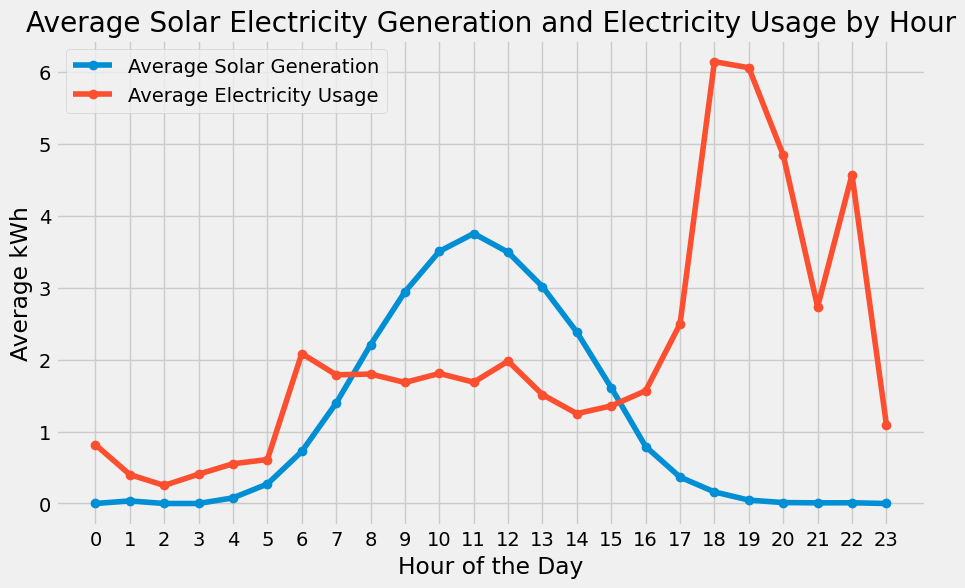

In [142]:
##extracting the hour from dtatetime column
df['Hour'] = df['Date/hour start'].dt.hour

# Grouping by hour and calculate the average solar electricity generation and electricity usage
hourly_avg = df.groupby('Hour').mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg['Solar electricity generation (kWh)'], marker='o', label='Average Solar Generation')
plt.plot(hourly_avg.index, hourly_avg['Electricity usage (kWh)'], marker='o', label='Average Electricity Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Average kWh')
plt.title('Average Solar Electricity Generation and Electricity Usage by Hour')
plt.xticks(range(24))  # Setting ticks for each hour of the day
plt.grid(True)
plt.legend()
plt.show()


This graph suggests that solar generation aligns with daylight hours, while electricity usage peaks during early morning and evening times, likely corresponding with daily human activity patterns.

## (ii)	Calculate, for each hour in 2020, the amount of electricity that needed to be bought from the electricity provider (measured in kWh and subject to a minimum of zero).	

In [143]:
df['Year'] = df['Date/hour start'].dt.year

In [144]:
df['Year'].value_counts()

##only the year 2020 was the data recorded

Year
2020    8759
Name: count, dtype: int64

In [145]:
# Calculating the amount of electricity needed to be bought
df['Electricity bought (kWh)'] = df['Electricity usage (kWh)'] - df['Solar electricity generation (kWh)']

# Set any negative values to zero (subject to a minimum of zero)
df['Electricity bought (kWh)'] = df['Electricity bought (kWh)'].clip(lower=0)



In [146]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Year,Electricity bought (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849,2020,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859,2020,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898,2020,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000,2020,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000,2020,0.960000
...,...,...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600,2020,4.383600
8756,20,2020-12-31 20:00:00,0.003,4.560600,2020,4.557600
8757,21,2020-12-31 21:00:00,0.000,2.022000,2020,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000,2020,1.653000


## (iii)	Calculate, for each hour in 2020, the excess solar electricity generated over electricity used (measured in kWh and subject to a minimum of zero).

In [147]:
## (-) values are the excess or just perform 
# Calculating the excess solar electricity generated over electricity used
df['Excess solar electricity (kWh)'] = df['Solar electricity generation (kWh)'] - df['Electricity usage (kWh)']

# Set any negative values to zero (subject to a minimum of zero)
df['Excess solar electricity (kWh)'] = df['Excess solar electricity (kWh)'].clip(lower=0)

In [148]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Year,Electricity bought (kWh),Excess solar electricity (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849,2020,1.509849,0.0
1,1,2020-01-01 01:00:00,0.000,1.411859,2020,1.411859,0.0
2,2,2020-01-01 02:00:00,0.000,1.023898,2020,1.023898,0.0
3,3,2020-01-01 03:00:00,0.000,0.642000,2020,0.642000,0.0
4,4,2020-01-01 04:00:00,0.000,0.960000,2020,0.960000,0.0
...,...,...,...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600,2020,4.383600,0.0
8756,20,2020-12-31 20:00:00,0.003,4.560600,2020,4.557600,0.0
8757,21,2020-12-31 21:00:00,0.000,2.022000,2020,2.022000,0.0
8758,22,2020-12-31 22:00:00,0.015,1.668000,2020,1.653000,0.0


## (iv)	Model the cumulative battery charge level (measured in kWh) for each hour over 2020, assuming a battery had already been installed.




The battery charge level should:

- begin at zero at 1 January 2020 00:00.
- allow for the increase or decrease in charge level depending on the hourly results of parts (ii) and (iii).
- be subject to the cap on the maximum battery charge level.

In [149]:
# Initialize variables
max_battery_charge = 12.5  # Maximum battery charge level in kWh
battery_charge_level = 0.0  # Initial battery charge level
cumulative_battery_charge = []


In [150]:
# Iterate through each hour
for index, row in df.iterrows():
    # Calculate net excess solar electricity (excess generation)
    excess_solar = row['Excess solar electricity (kWh)'] 
    

    # Update battery charge level
    battery_charge_level += excess_solar
    
    if battery_charge_level > row['Electricity bought (kWh)']:
        battery_charge_level -= row['Electricity bought (kWh)']
    
    # Cap battery charge level at maximum
    battery_charge_level = min(battery_charge_level, max_battery_charge)
    
    # Append the current battery charge level to the list
    cumulative_battery_charge.append(battery_charge_level)

# Add the cumulative battery charge level to the DataFrame
df['Cumulative battery charge (kWh)'] = cumulative_battery_charge

In [151]:
#df.drop(columns=['Cumulative battery charge (kWh)'], inplace=True)

In [152]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Year,Electricity bought (kWh),Excess solar electricity (kWh),Cumulative battery charge (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849,2020,1.509849,0.0,0.000000
1,1,2020-01-01 01:00:00,0.000,1.411859,2020,1.411859,0.0,0.000000
2,2,2020-01-01 02:00:00,0.000,1.023898,2020,1.023898,0.0,0.000000
3,3,2020-01-01 03:00:00,0.000,0.642000,2020,0.642000,0.0,0.000000
4,4,2020-01-01 04:00:00,0.000,0.960000,2020,0.960000,0.0,0.000000
...,...,...,...,...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600,2020,4.383600,0.0,1.132298
8756,20,2020-12-31 20:00:00,0.003,4.560600,2020,4.557600,0.0,1.132298
8757,21,2020-12-31 21:00:00,0.000,2.022000,2020,2.022000,0.0,1.132298
8758,22,2020-12-31 22:00:00,0.015,1.668000,2020,1.653000,0.0,1.132298


In [153]:
df['Excess solar electricity (kWh)'][df['Cumulative battery charge (kWh)'] != 0.0]

9       0.240
10      0.000
11      0.000
12      0.255
13      0.000
        ...  
8755    0.000
8756    0.000
8757    0.000
8758    0.000
8759    0.000
Name: Excess solar electricity (kWh), Length: 8750, dtype: float64

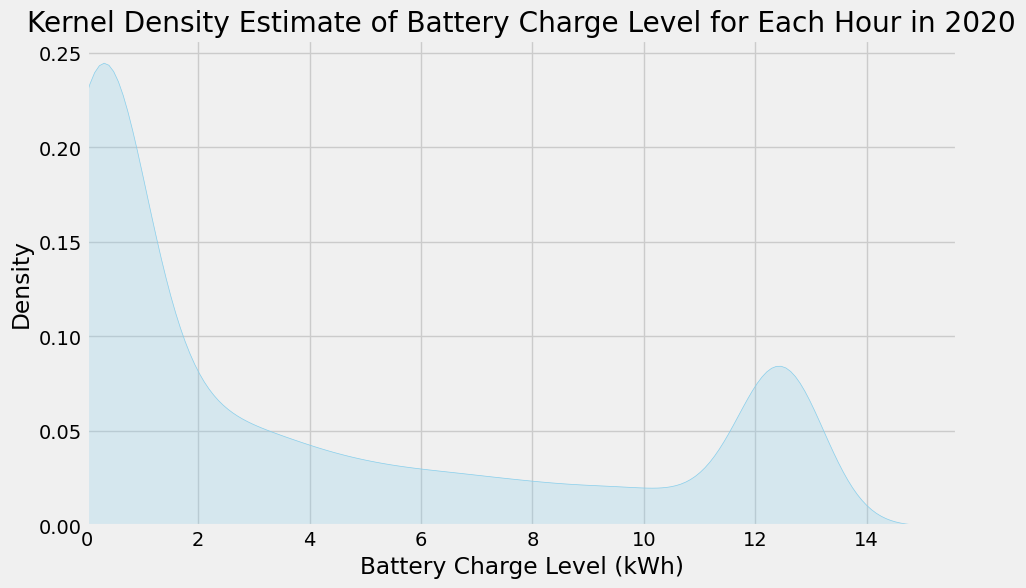

In [154]:
# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Cumulative battery charge (kWh)', fill=True, color='skyblue')
plt.xlabel('Battery Charge Level (kWh)')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Battery Charge Level for Each Hour in 2020')
plt.xlim(left=0)  # Set the limit of the x-axis to start from 0
plt.grid(True)
plt.show()

In [155]:
#no negative battery charge levels
df['Cumulative battery charge (kWh)'][df['Cumulative battery charge (kWh)'] < 0.0]

Series([], Name: Cumulative battery charge (kWh), dtype: float64)

-Dual Peaks: The graph has two prominent peaks, suggesting two common states of battery charge levels.

-Charge Levels: One peak is near 0 kWh, indicating a frequent low or depleted battery state. The other peak, around 12.5 kWh, suggests a 

-commonly full or nearly full charge state.

## (v)	Calculate the amount of electricity for each hour in 2020 that would have been bought from the electricity provider (measured in kWh and subject to a minimum of zero), assuming a battery had already been installed.	



In [156]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Year,Electricity bought (kWh),Excess solar electricity (kWh),Cumulative battery charge (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849,2020,1.509849,0.0,0.000000
1,1,2020-01-01 01:00:00,0.000,1.411859,2020,1.411859,0.0,0.000000
2,2,2020-01-01 02:00:00,0.000,1.023898,2020,1.023898,0.0,0.000000
3,3,2020-01-01 03:00:00,0.000,0.642000,2020,0.642000,0.0,0.000000
4,4,2020-01-01 04:00:00,0.000,0.960000,2020,0.960000,0.0,0.000000
...,...,...,...,...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600,2020,4.383600,0.0,1.132298
8756,20,2020-12-31 20:00:00,0.003,4.560600,2020,4.557600,0.0,1.132298
8757,21,2020-12-31 21:00:00,0.000,2.022000,2020,2.022000,0.0,1.132298
8758,22,2020-12-31 22:00:00,0.015,1.668000,2020,1.653000,0.0,1.132298


In [157]:
##renaming column of electricity bought


df.rename(columns={'Electricity bought (kWh)': 'Electricity bought (kWh)_battery_n/a'}, inplace=True)

In [158]:

electricity_bought_list = [] 

for index, row in df.iterrows():
    # Calculate net excess solar electricity (excess generation)
    usage = row['Electricity usage (kWh)'] 
    solar_gen = row['Solar electricity generation (kWh)']
    cummulative_battery_level = row['Cumulative battery charge (kWh)']

    x = solar_gen-usage
    if (x) < 0:
        y = cummulative_battery_level - abs(x)
        if y < 0:
            electricity_bought_list.append(abs(y))
        else:
            electricity_bought_list.append(0)
    else:
        electricity_bought_list.append(0)

        
    
    
df['electricity bought(kwh)_battery_is_available'] = electricity_bought_list

In [159]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Year,Electricity bought (kWh)_battery_n/a,Excess solar electricity (kWh),Cumulative battery charge (kWh),electricity bought(kwh)_battery_is_available
0,0,2020-01-01 00:00:00,0.000,1.509849,2020,1.509849,0.0,0.000000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859,2020,1.411859,0.0,0.000000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898,2020,1.023898,0.0,0.000000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000,2020,0.642000,0.0,0.000000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000,2020,0.960000,0.0,0.000000,0.960000
...,...,...,...,...,...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600,2020,4.383600,0.0,1.132298,3.251302
8756,20,2020-12-31 20:00:00,0.003,4.560600,2020,4.557600,0.0,1.132298,3.425302
8757,21,2020-12-31 21:00:00,0.000,2.022000,2020,2.022000,0.0,1.132298,0.889702
8758,22,2020-12-31 22:00:00,0.015,1.668000,2020,1.653000,0.0,1.132298,0.520702


In [160]:
#filter for when excess != 0
df[df['Excess solar electricity (kWh)'] != 0.0]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Year,Electricity bought (kWh)_battery_n/a,Excess solar electricity (kWh),Cumulative battery charge (kWh),electricity bought(kwh)_battery_is_available
9,9,2020-01-01 09:00:00,0.846,0.606,2020,0.0,0.240,0.240000,0.0
12,12,2020-01-01 12:00:00,0.651,0.396,2020,0.0,0.255,0.495000,0.0
17,17,2020-01-01 17:00:00,0.006,-12.624,2020,0.0,12.630,12.500000,0.0
58,10,2020-01-03 10:00:00,1.086,0.897,2020,0.0,0.189,0.318724,0.0
59,11,2020-01-03 11:00:00,0.993,0.726,2020,0.0,0.267,0.585724,0.0
...,...,...,...,...,...,...,...,...,...
8723,11,2020-12-30 11:00:00,1.383,1.260,2020,0.0,0.123,0.198267,0.0
8724,12,2020-12-30 12:00:00,3.957,1.308,2020,0.0,2.649,2.847267,0.0
8725,13,2020-12-30 13:00:00,1.641,1.512,2020,0.0,0.129,2.976267,0.0
8749,13,2020-12-31 13:00:00,2.535,0.471,2020,0.0,2.064,2.071298,0.0


## (vi)	Calculate the saving over 2020 (in dollars ($), using 1 January 2022 electricity prices and ignoring discounting) from installing a battery compared to using the existing solar panels alone.

In [161]:
#From 1 January 2022, Naomi will pay $0.17 for each kWh of electricity purchased from her electricity provider
electricity_price_2022 = 0.17 

In [162]:
df['Electricity cost without battery ($)'] = df['Electricity bought (kWh)_battery_n/a'] * electricity_price_2022
df['Electricity cost without battery ($)']

0       0.256674
1       0.240016
2       0.174063
3       0.109140
4       0.163200
          ...   
8755    0.745212
8756    0.774792
8757    0.343740
8758    0.281010
8759    0.137006
Name: Electricity cost without battery ($), Length: 8759, dtype: float64

In [163]:
print(df['Electricity cost without battery ($)'].sum(),'$ is spent if battery is not installed')

2656.292210048 $ is spent if battery is not installed


In [164]:
df['Electricity cost with battery ($)'] = df['electricity bought(kwh)_battery_is_available'] * electricity_price_2022
df['Electricity cost with battery ($)']

0       0.256674
1       0.240016
2       0.174063
3       0.109140
4       0.163200
          ...   
8755    0.552721
8756    0.582301
8757    0.151249
8758    0.088519
8759    0.081522
Name: Electricity cost with battery ($), Length: 8759, dtype: float64

In [165]:
print(df['Electricity cost with battery ($)'].sum(),'$ is spent in the year 2020 if battery is  installed')

1764.2224876300004 $ is spent in the year 2020 if battery is  installed


## (vii)	Tabulate the data appropriately and then produce a chart to illustrate, on a monthly basis for the calendar year and measured in kWh, the:

- monthly solar generation.

- monthly electricity usage.

- monthly electricity purchased from the electricity provider (no battery).

- monthly electricity purchased from the electricity provider (with battery).


In [166]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Year,Electricity bought (kWh)_battery_n/a,Excess solar electricity (kWh),Cumulative battery charge (kWh),electricity bought(kwh)_battery_is_available,Electricity cost without battery ($),Electricity cost with battery ($)
0,0,2020-01-01 00:00:00,0.000,1.509849,2020,1.509849,0.0,0.000000,1.509849,0.256674,0.256674
1,1,2020-01-01 01:00:00,0.000,1.411859,2020,1.411859,0.0,0.000000,1.411859,0.240016,0.240016
2,2,2020-01-01 02:00:00,0.000,1.023898,2020,1.023898,0.0,0.000000,1.023898,0.174063,0.174063
3,3,2020-01-01 03:00:00,0.000,0.642000,2020,0.642000,0.0,0.000000,0.642000,0.109140,0.109140
4,4,2020-01-01 04:00:00,0.000,0.960000,2020,0.960000,0.0,0.000000,0.960000,0.163200,0.163200
...,...,...,...,...,...,...,...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600,2020,4.383600,0.0,1.132298,3.251302,0.745212,0.552721
8756,20,2020-12-31 20:00:00,0.003,4.560600,2020,4.557600,0.0,1.132298,3.425302,0.774792,0.582301
8757,21,2020-12-31 21:00:00,0.000,2.022000,2020,2.022000,0.0,1.132298,0.889702,0.343740,0.151249
8758,22,2020-12-31 22:00:00,0.015,1.668000,2020,1.653000,0.0,1.132298,0.520702,0.281010,0.088519


In [167]:
# Group by month and calculate the sum of each relevant column
monthly_data = df.resample('M', on='Date/hour start').sum()



In [168]:
monthly_data.shape

(12, 10)

In [169]:
monthly_data

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Year,Electricity bought (kWh)_battery_n/a,Excess solar electricity (kWh),Cumulative battery charge (kWh),electricity bought(kwh)_battery_is_available,Electricity cost without battery ($),Electricity cost with battery ($)
Date/hour start,,,,,,,,,,
2020-01-31,8544,261.045,1705.180181,1500860,1599.601181,155.466000,986.561135,1304.567315,271.932201,221.776444
2020-02-29,7728,449.634,1557.578810,1357440,1392.808310,284.863500,1706.376020,992.122042,236.777413,168.660747
2020-03-31,8556,602.451,1797.859450,1502880,1619.011450,423.603000,2087.462175,1202.916253,275.231946,204.495763
2020-04-30,8280,915.132,1726.356487,1454400,1460.504519,649.280032,2721.895143,1030.855121,248.285768,175.245371
2020-05-31,8556,1641.360,943.803809,1502880,717.333809,1414.890000,5298.671532,270.515246,121.946748,45.987592
2020-06-30,8280,1408.287,1158.995538,1454400,844.784538,1094.076000,4619.014563,364.024422,143.613372,61.884152
2020-07-31,8556,1371.465,1196.957121,1502880,907.445121,1081.953000,4539.979181,418.850327,154.265671,71.204556
2020-08-31,8556,1158.639,1491.525351,1502880,1217.886351,885.000000,4338.259270,620.582419,207.040680,105.499011
2020-09-30,8280,835.680,1620.714165,1454400,1398.834165,613.800000,2964.604220,857.356994,237.801808,145.750689


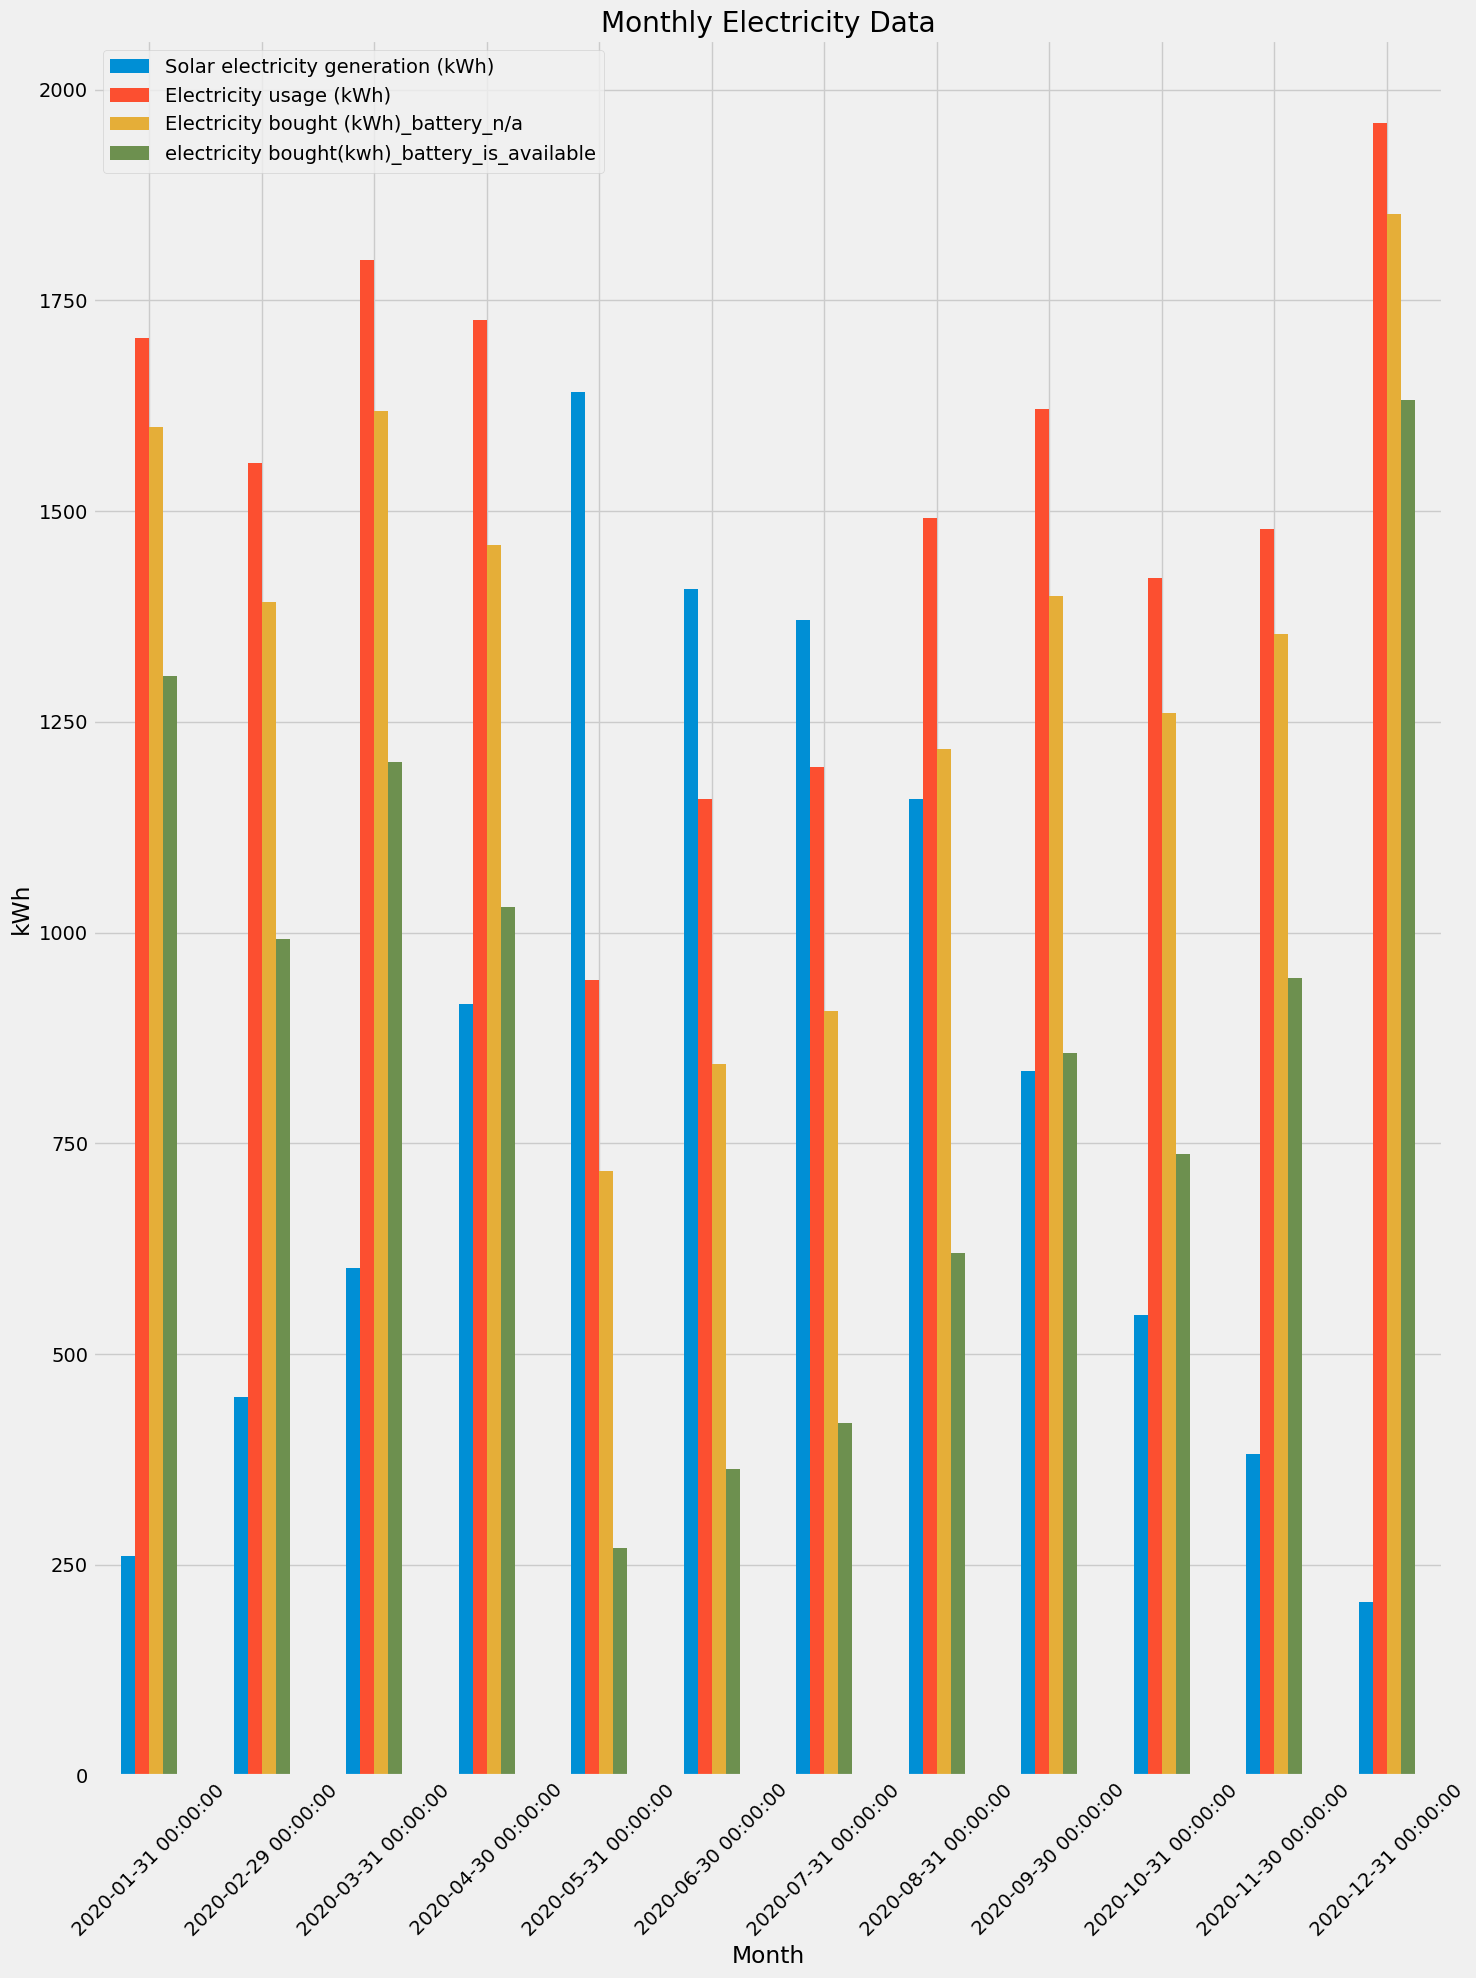

In [170]:
# Plotting
monthly_data.plot(kind='bar', y=['Solar electricity generation (kWh)', 'Electricity usage (kWh)',
                                  'Electricity bought (kWh)_battery_n/a','electricity bought(kwh)_battery_is_available'],
                   figsize=(15, 20))
plt.xlabel('Month')
plt.ylabel('kWh')
plt.title('Monthly Electricity Data')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## (viii)	(a)	Project forward for 20 years from 1 January 2022 the annual savings from installing the battery for the two scenarios below.

(b)	For the two scenarios, calculate the Net Present Value (NPV) of the future annual savings.

The scenarios are as follows:

1.	Electricity prices increase as expected by the government, 4% p.a.
2.	Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi.


In [174]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Year,Electricity bought (kWh)_battery_n/a,Excess solar electricity (kWh),Cumulative battery charge (kWh),electricity bought(kwh)_battery_is_available,Electricity cost without battery ($),Electricity cost with battery ($)
0,0,2020-01-01 00:00:00,0.000,1.509849,2020,1.509849,0.0,0.000000,1.509849,0.256674,0.256674
1,1,2020-01-01 01:00:00,0.000,1.411859,2020,1.411859,0.0,0.000000,1.411859,0.240016,0.240016
2,2,2020-01-01 02:00:00,0.000,1.023898,2020,1.023898,0.0,0.000000,1.023898,0.174063,0.174063
3,3,2020-01-01 03:00:00,0.000,0.642000,2020,0.642000,0.0,0.000000,0.642000,0.109140,0.109140
4,4,2020-01-01 04:00:00,0.000,0.960000,2020,0.960000,0.0,0.000000,0.960000,0.163200,0.163200
...,...,...,...,...,...,...,...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600,2020,4.383600,0.0,1.132298,3.251302,0.745212,0.552721
8756,20,2020-12-31 20:00:00,0.003,4.560600,2020,4.557600,0.0,1.132298,3.425302,0.774792,0.582301
8757,21,2020-12-31 21:00:00,0.000,2.022000,2020,2.022000,0.0,1.132298,0.889702,0.343740,0.151249
8758,22,2020-12-31 22:00:00,0.015,1.668000,2020,1.653000,0.0,1.132298,0.520702,0.281010,0.088519


In [177]:
df['Electricity cost without battery ($)'].sum()

2656.292210048

In [178]:
df['Electricity cost with battery ($)'].sum()

1764.2224876300004

In [193]:
# Define parameters
battery_installation_cost = 7000  # Battery installation cost
initial_electricity_price = 0.17  # Initial electricity price from 1 January 2022 ($/kWh)
annual_electricity_price_inflation_government = 0.04  # Annual electricity price inflation as expected by the government
annual_electricity_price_inflation_naomi = 0.0025  # Additional annual electricity price inflation estimated by Naomi (0.25% p.a.)

# Electricity usage data (assuming same as 2020 for simplicity)
# You may replace this with your actual electricity usage data
electricity_usage = df['Electricity usage (kWh)'].sum() # kWh/year

# Initialize variables to store cumulative savings for each scenario over 20 years

cash_flows_scenario1  = []
cash_flows_scenario2 = []
n=1
# Iterate over 20 years from 2022 to 2041
for year in range(2022, 2042):
    # Calculate annual electricity cost without the battery
    annual_electricity_cost_without_battery = df['Electricity cost without battery ($)'].sum()

    # Calculate the new electricity price with battery for each scenario
    # Scenario 1: Electricity prices increase as expected by the government (4% p.a.)
    annual_electricity_price_without_battery_scenario1 = annual_electricity_cost_without_battery * (initial_electricity_price * (n + annual_electricity_price_inflation_government))

    # Scenario 2: Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi
    annual_electricity_price_without_battery_scenario2 = annual_electricity_cost_without_battery * (initial_electricity_price * (n + annual_electricity_price_inflation_government + annual_electricity_price_inflation_naomi))

    # Calculate the annual electricity cost with the battery
    annual_electricity_cost_with_battery = df['Electricity cost with battery ($)'].sum()

    # Calculate the new electricity price with battery for each scenario
    # Scenario 1: Electricity prices increase as expected by the government (4% p.a.)
    annual_electricity_price_with_battery_scenario1 = annual_electricity_cost_with_battery * (initial_electricity_price * (n + annual_electricity_price_inflation_government))

    # Scenario 2: Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi
    annual_electricity_price_with_battery_scenario2 = annual_electricity_cost_with_battery * (initial_electricity_price * (n + annual_electricity_price_inflation_government + annual_electricity_price_inflation_naomi))

    n+=1
    # Calculate the annual savings for each scenario
    annual_savings_scenario1 = annual_electricity_price_without_battery_scenario1 - annual_electricity_price_with_battery_scenario1
    annual_savings_scenario2 = annual_electricity_price_without_battery_scenario2 - annual_electricity_price_with_battery_scenario2

    cash_flows_scenario1.append(annual_savings_scenario1)
    cash_flows_scenario2.append(annual_savings_scenario2)

def sum_list(lst):
    total = 0
    for num in lst:
        total += num
    return total


print("cumulative Savings for Scenario 1 after 20 years: ${:.2f}".format(sum_list(cash_flows_scenario1)))
print("cumulative Savings for Scenario 1 after 20 years: ${:.2f}".format(sum_list(cash_flows_scenario2)))


cumulative Savings for Scenario 1 after 20 years: $31968.21
cumulative Savings for Scenario 1 after 20 years: $31975.79


In [202]:
cash_flows_scenario1

[157.71792692350238,
 309.36977973456226,
 461.0216325456222,
 612.6734853566822,
 764.3253381677423,
 915.9771909788021,
 1067.6290437898624,
 1219.280896600922,
 1370.932749411982,
 1522.584602223042,
 1674.2364550341013,
 1825.8883078451613,
 1977.5401606562223,
 2129.192013467282,
 2280.843866278341,
 2432.495719089401,
 2584.147571900462,
 2735.799424711521,
 2887.451277522581,
 3039.1031303336413]

## (b)	For the two scenarios, calculate the Net Present Value (NPV) of the future annual savings.

In [185]:
# Define discount rate
discount_rate = 0.06  # 6% per annum
n=1
for n in range(2022,2042):
    n = n*0.06

In [197]:
def calculate_npv(initial_investment, cash_flows, discount_rate):
    """
    Calculate the Net Present Value (NPV) of an investment project.

    Parameters:
        initial_investment (float): The initial investment or cost of the project.
        cash_flows (list): List of cash flows for each period.
        discount_rate (float): The discount rate per period.

    Returns:
        float: The Net Present Value (NPV) of the investment project.
    """
    npv = -initial_investment  # Start with negative initial investment
    
    for t, cash_flow in enumerate(cash_flows):
        npv += cash_flow / (1 + discount_rate) ** (t + 1)
    
    return npv




In [198]:
##calculating npv for scenario1
initial_investment = 7000  # Initial investment


npv = calculate_npv(initial_investment, cash_flows_scenario1, discount_rate)
print("NPV:", round(npv, 2))


NPV: 8037.67


In [199]:
##calculating npv for scenario2
initial_investment = 7000  # Initial investment


npv = calculate_npv(initial_investment, cash_flows_scenario2, discount_rate)
print("NPV:", round(npv, 2))


NPV: 8042.02


- Both scenarios result in positive NPVs, indicating that the present value of expected future cash flows (savings from installing the battery system) exceeds the initial investment cost.

- The NPV for Scenario 2 is slightly higher than that of Scenario 1. This suggests that under the assumptions made in the analysis, the additional increase in electricity prices estimated by Naomi leads to slightly higher savings over time compared to the scenario with only government-projected price increases.

- Overall, both scenarios indicate that installing the battery system is financially beneficial, as the present value of expected future savings exceeds the initial investment cost. However, Scenario 2 may offer slightly higher returns over the long term due to the higher projected electricity price increases.

## (ix)	Calculate the Internal Rate of Return (IRR) for the two scenarios in part (viii) by determining the discount rate that equates the net present value of the future annual savings to the initial cost of the battery for each scenario.

In [206]:
import numpy_financial as npf

In [210]:
#Calculate IRR for Scenario 1
 
scenario1 = [-7000] + cash_flows_scenario1

npf.irr(scenario1)




0.13422414459899623

IRR is of approximately 13.42% indicates the annualized effective compounded return rate that the battery investment is expected to generate over the 20-year period, considering the initial investment and future cash flows.

In [212]:
##calculate IRR for scenario 2
scenario2 = [-7000] + cash_flows_scenario2
npf.irr(scenario2)

0.13426466300317674

Comparing it to Scenario 1, which had an IRR of approximately 13.42%, the difference is marginal. It suggests that under the assumptions made in the analysis, both scenarios offer similar expected returns on the battery investment over the long term.

based on the findings i find it sound for naomi to invest on installing the battery no matter the financila scenarios.This is because:
- generates reasonable savings on electricity price over the years

- Positive NPV: In both scenarios, the Net Present Value (NPV) of the future annual savings from installing the battery system exceeds the initial investment cost. This suggests that the present value of expected future cash flows is greater than the initial investment, indicating potential profitability.

- Reasonable IRR: The Internal Rate of Return (IRR) for both scenarios is approximately 13.4%. This indicates that the investment is expected to generate returns that are competitive with alternative investment opportunities, considering the time value of money.